## Flip
pip install pillow

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = '/home/aiffel0049/aiffel/Going_Deeper/2.augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel0049/aiffel/Going_Deeper/2.augmentation/images/mycat.jpg'

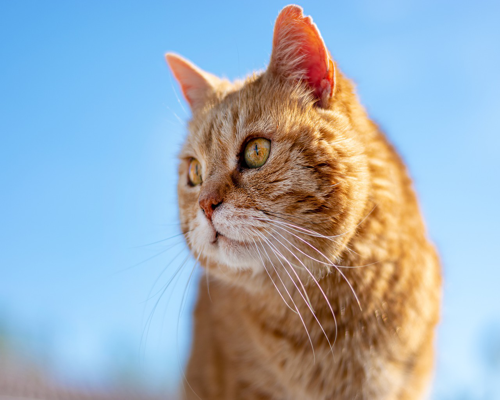

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

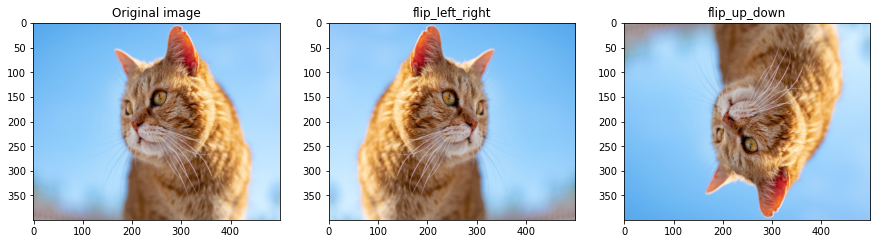

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

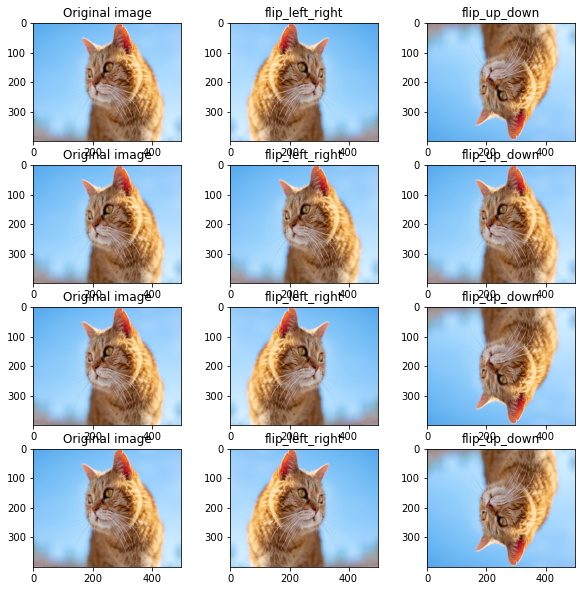

In [4]:
plt.figure(figsize=(10, 10))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## Center Crop

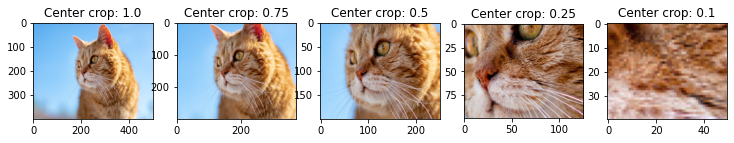

In [6]:
plt.figure(figsize=(15, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

In [7]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

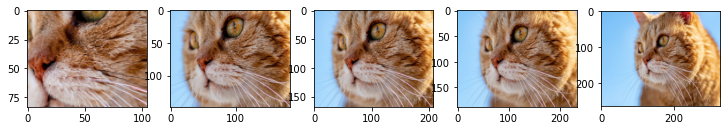

In [8]:
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

- tf.random.uniform() : 균등분포로부터의 난수값을 반환
- tf.random.normal() : 정규분포로부터의 난수값을 반환
    - mean, std로 분포 조절 가능

## Random crop
- https://www.tensorflow.org/api_docs/python/tf/image/random_crop

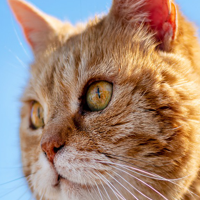

In [10]:
# apply random_crop on cat image
# 여기에 코드를 입력해 주세요.
crop_tensor = tf.image.random_crop(image_tensor, [200, 200, 3])
crop_image = tf.keras.preprocessing.image.array_to_img(crop_tensor)

crop_image

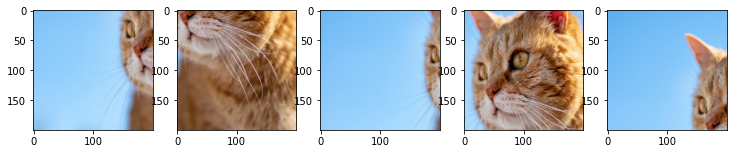

In [11]:
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    crop_tensor = tf.image.random_crop(image_tensor, [200, 200, 3])
    crop_image = tf.keras.preprocessing.image.array_to_img(crop_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(crop_image)

## Brightness
- https://www.tensorflow.org/api_docs/python/tf/image/random_brightness

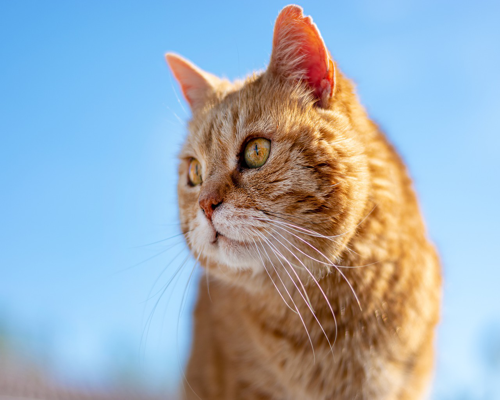

In [28]:
# apply random_brightness on cat image
# 여기에 코드를 입력해 주세요.
bright_tensor = tf.image.random_brightness(image_tensor, 255)
bright_image = tf.keras.preprocessing.image.array_to_img(bright_tensor)

bright_image

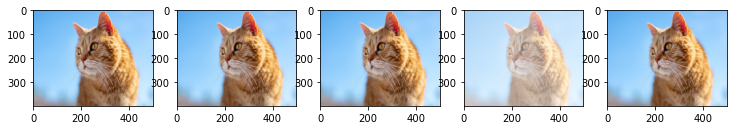

In [29]:
# display 5 random brightness images
# 여기에 코드를 입력해 주세요.
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    bright_tensor = tf.image.random_brightness(image_tensor, 255)
    bright_image = tf.keras.preprocessing.image.array_to_img(bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(bright_image)

## imgaug Library

- pip install -q imgaug

In [30]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)

### affine 변환
- https://darkpgmr.tistory.com/79

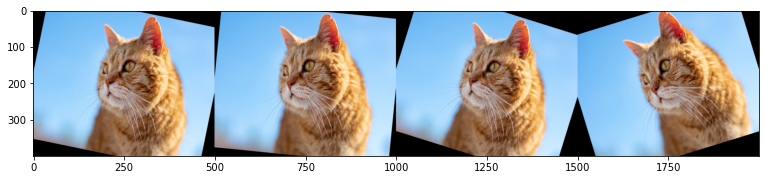

In [31]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

- -25 ~ 25도 사이로 변환

### iaa.Crop()

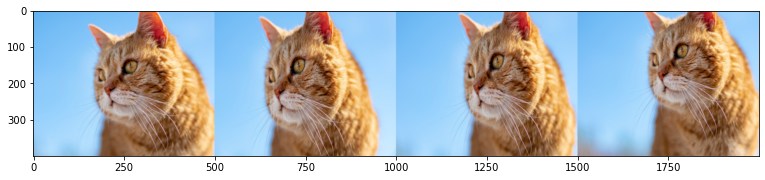

In [32]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### iaa.Sequential()
- 여러 augmentation 기법 여러 개를 순차적으로 적용

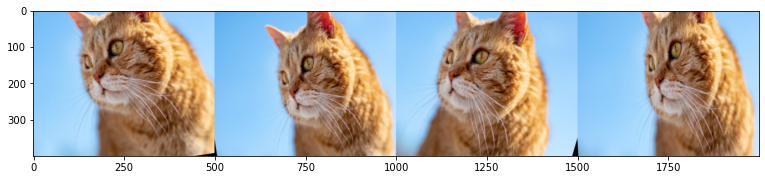

In [33]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

- 순차적이 아닌 랜덤하게 적용

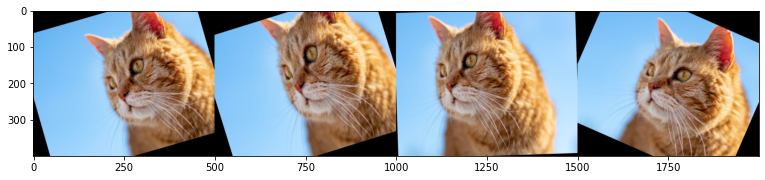

In [34]:
# Modify iaa.sequential to use random step
# 여기에 코드를 입력하세요.
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
], random_order=True)
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### iaa.OneOf()
- 여러 기법 중 하나를 선택

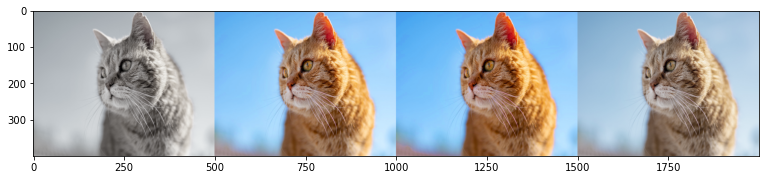

In [37]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### iaa.Sometimes()
- 여러 기법들을 확률적으로 적용

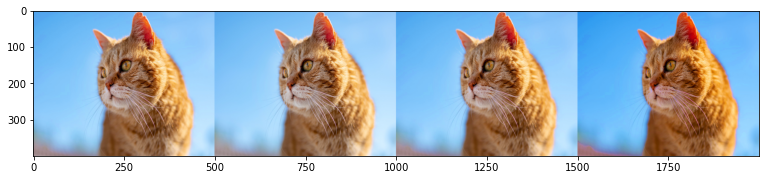

In [42]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Sometimes(0.2, iaa.Grayscale(alpha=(0.0, 1.0))),
     iaa.Sometimes(0.6, iaa.AddToSaturation((-50, 50)))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### application

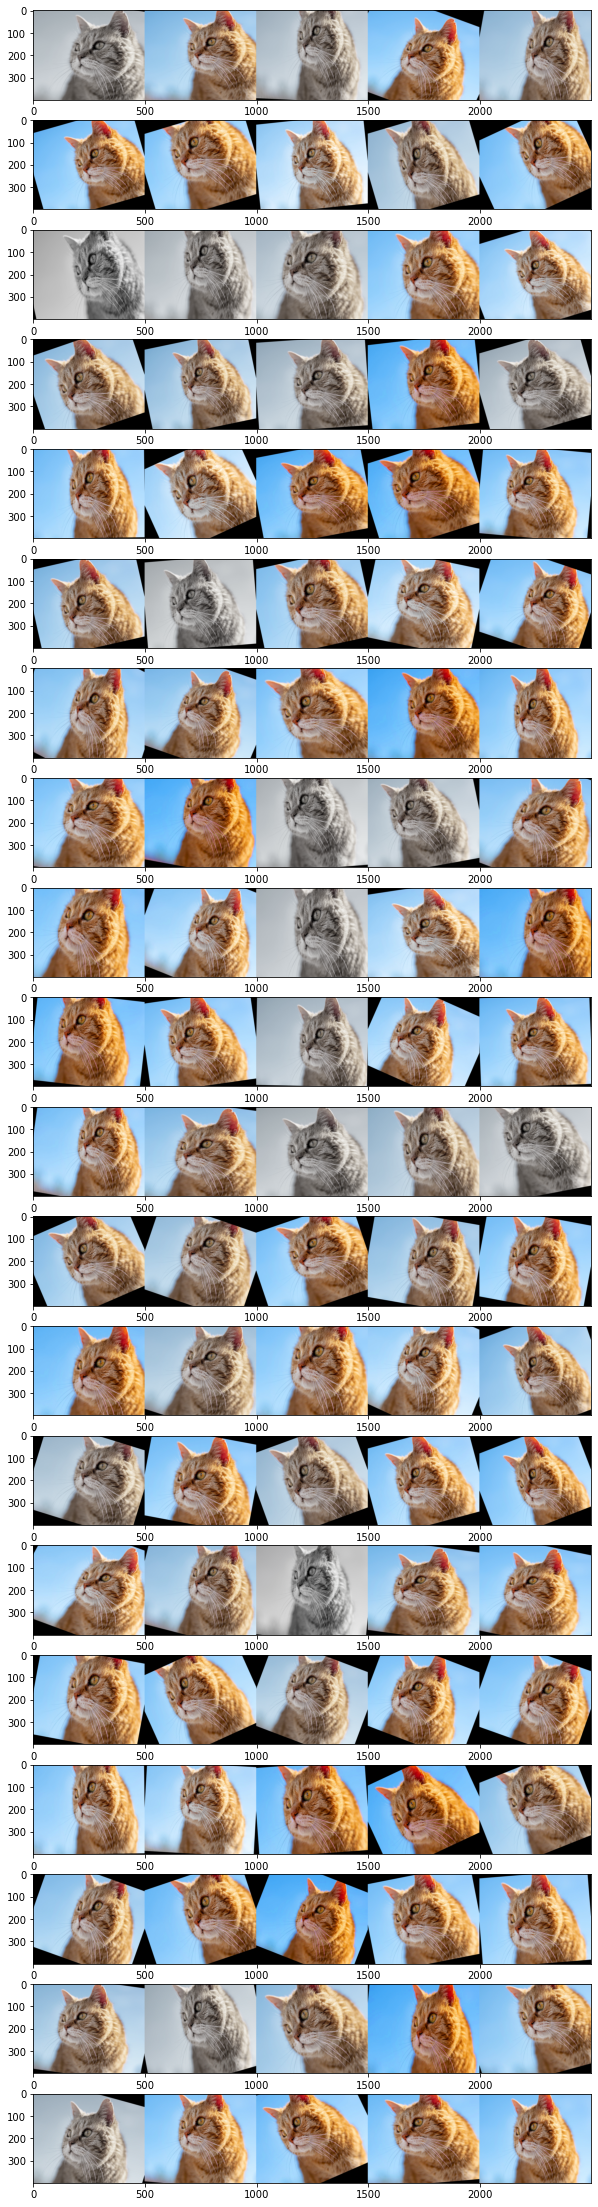

In [52]:
seq = iaa.Sequential([
    iaa.Sequential([
        iaa.Affine(rotate=(-25, 25)),
        iaa.Crop(percent=(0, 0.2))
    ], random_order=True),
    iaa.OneOf([
        iaa.Grayscale(alpha=(0.0, 1.0)),
        iaa.Sometimes(0.5, iaa.AddToSaturation((-50, 50)))
    ])
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    image_aug = seq(images=images)
    plt.subplot(20, 1, i+1)
    plt.imshow(np.hstack(image_aug))

plt.show()